# Data Analysis and Preprocessing of Wine Quality Dataset
In this analysis, the wine quality dataset is explored, with data cleaning, visual analysis, and feature scaling performed. The following steps outline the process:

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder  

## Reading the data:

In [18]:
df = pd.read_csv('/home/betty/Desktop/cURRENTLY_WORKING/winequality_data.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Visual Analysis:
- Correlation Matrix: To understand the relationships between the features, a correlation matrix is generated. A heatmap is plotted for visual analysis.

- Feature Selection Based on Correlation: Remove redundant features to improve model performance and interpretability.

- Checking the 'quality' column: This step helps to understand the distribution of quality scores in the dataset.

- Visualizing Wine Quality Distribution: A bar plot shows how the wines are distributed according to their quality score. This helps to identify the frequency of wines with each quality rating.

- Binning 'Quality' into Categories (Low vs High): The 'quality' column is binned into two categories: 'low' and 'high'. This simplifies the analysis into a binary classification problem.

- Removing the ID column: The 'Id' column is an identifier with no predictive value, so it is removed to ensure it does not influence the analysis.

- Checking for outliers: A boxplot is created for each feature to identify potential outliers.

- Feature Scaling (Normalization): Feature scaling is applied to standardize the data, ensuring that all features are on a similar scale for machine learning algorithms.


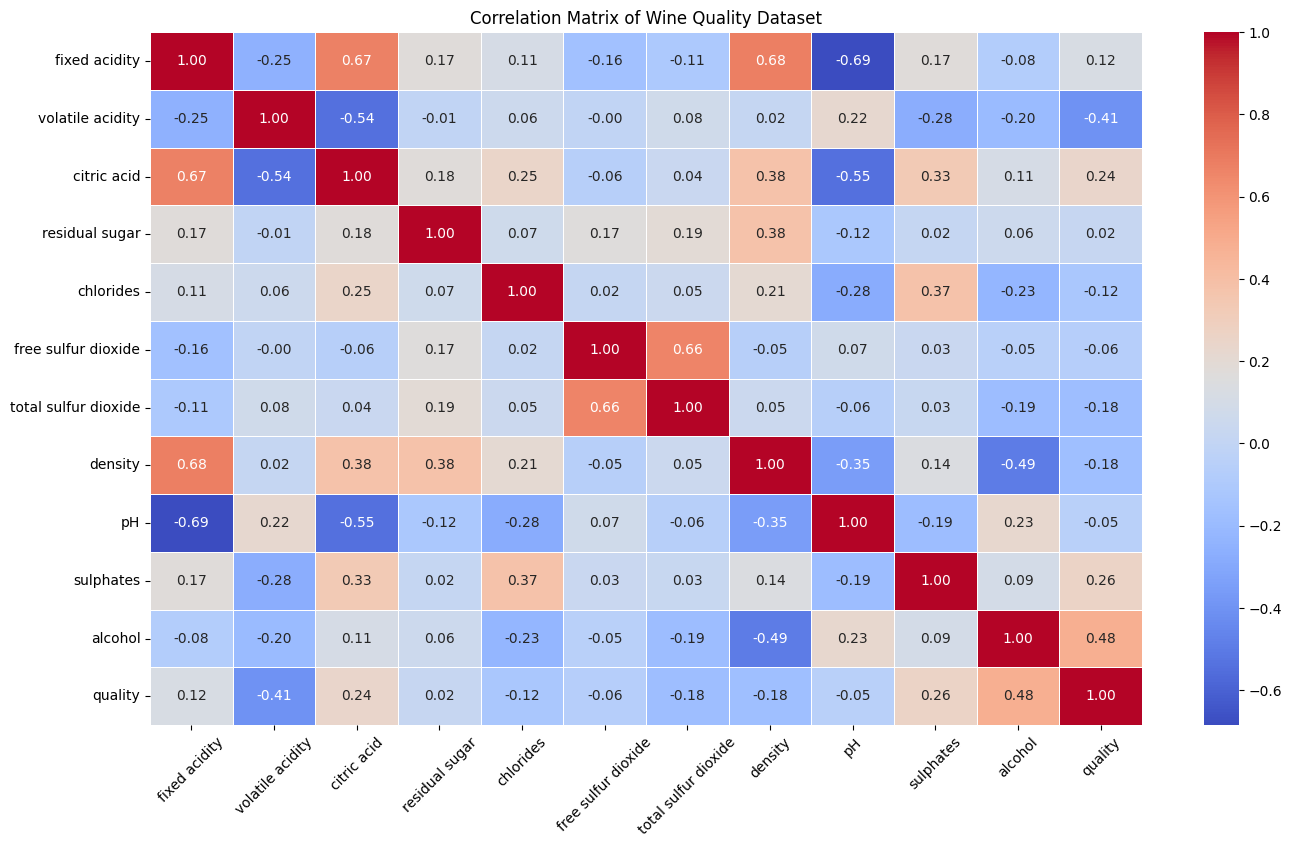

In [19]:
df = df.drop(columns=['Id'])
corr_matrix = df.corr()
# Plot heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Wine Quality Dataset")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


## Features with Positve Correlation with Quality:

### Alcohol (0.484866)
- Strong positive correlation. As alcohol content increases, the wine quality tends to improve.
- Alcohol content is one of the strongest predictors of wine quality. This makes sense as higher alcohol content often signifies a more robust, well-fermented wine.
### Sulphates (0.257710)
- Moderate positive correlation. As the level of sulphates in the wine increases, so does the wine quality.
- Sulphates are typically added to preserve the wine and prevent spoilage. This positive correlation might indicate that wines with higher sulphate content are better preserved and thus have higher quality.
### Citric Acid (0.240821)
- Moderate positive correlation. More citric acid often means a fresher, more balanced wine.
- Citric acid enhances the wine's acidity, providing structure and a refreshing taste. This is why wines with higher citric acid content tend to have better quality.

## Why Remove These Columns?
df = df.drop(columns = [fixed acidity','chlorides', "free sulfur dioxide"])

- Redundancy: When two or more features are highly correlated, they provide almost the same information. Keeping both does not add value and may introduce multicollinearity, which can negatively impact some models.

- No Impact on the Target Variable: Since these features do not have a strong correlation with the target variable, they are unlikely to contribute to improving model predictions. Removing them simplifies the model without sacrificing performance.

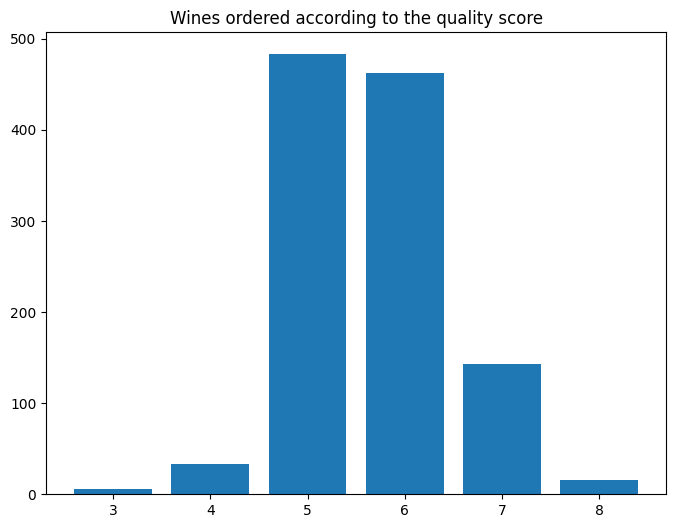

In [ ]:
# Bar Plot the wines according to their quality
counts = df['quality'].value_counts()
title = 'Wines ordered according to the quality score'
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.bar(list(counts.keys()), counts)
ax.set_title(title)
plt.show()

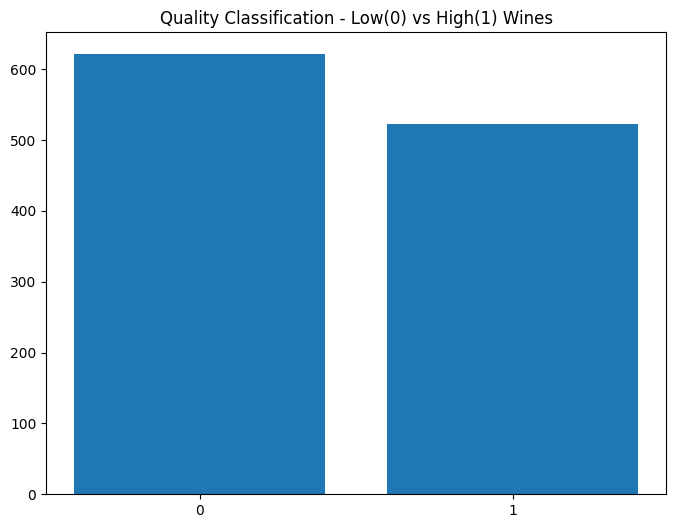

In [ ]:
# Binning the 'quality' column into binary classification: 'low', 'high'
bins = [2, 5, 9]  
group_names = ['low', 'high']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=group_names)
# Encoding (0 for 'low', 1 for 'high')
le = LabelEncoder()
df['quality'] = le.fit_transform(df['quality'])

# Visualize the high and low wines
counts = df['quality'].value_counts()
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.bar(list(counts.keys()), counts)
ax.set_xticks(counts.keys())
title = "Quality Classification - Low(0) vs High(1) Wines"
ax.set_title(title)
plt.show()


/tmp/ipykernel_4963/664592769.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


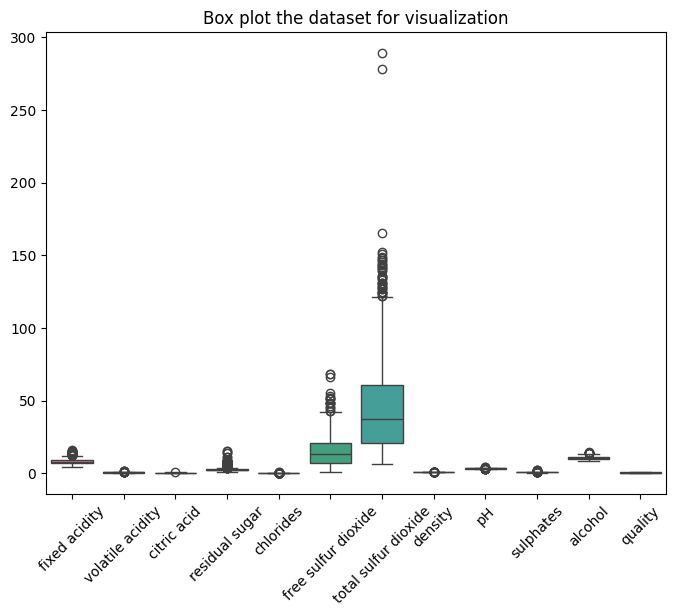

In [ ]:

# Box plot the dataset for visualization
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax = sns.boxplot(df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Box plot the dataset for visualization')
plt.show()

/tmp/ipykernel_4963/1757778095.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


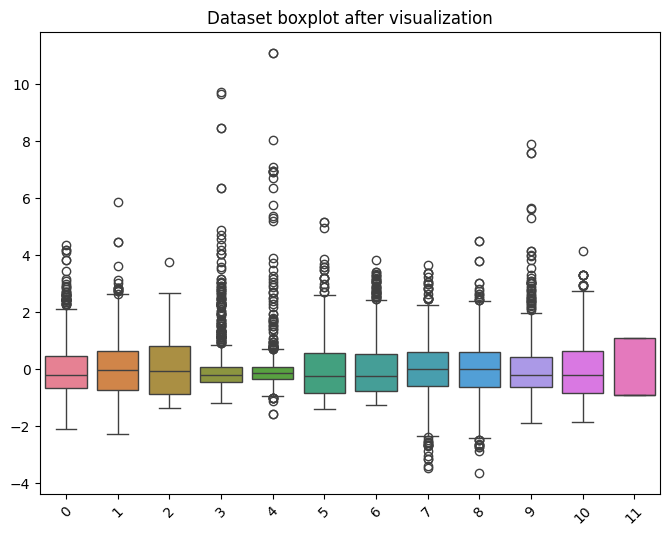

In [ ]:
# Removing outliers
df = df[df['total sulfur dioxide'] < 200]

# Standardize features
scaler = StandardScaler()
df = scaler.fit_transform(df)

# Visualize the dataset to see the effects of Normalization
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax = sns.boxplot(df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Dataset boxplot after visualization')
plt.show()